<h1 style='text-align: center; front-size: 50px;'>Patterns Behind Best-Selling Games</h1>

# Introduction:

In this project, we will work with data from the online store 'Ice', which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open source. Our mission is to clean up the data and prepare a report that gives insight into identifying patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.The dataset is stored in a single file (/datasets/games.csv). During data preprocessing, we will:

- Load and display the dataset in a standardized format.
- Verify and correct data types.
- Identify and handle missing values.
- Detect and remove duplicate entries.
- Create visualizations to clearly communicate insights from the data.

By following this process, we aim to produce a detailed report that provides actionable insights for business strategy.

# Step 1. Initialization:

In [ ]:
# Loading all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 2. Load data:

In [ ]:
video_games = pd.read_csv('/datasets/games.csv')
video_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Step 3. Preparing and Fixing the Data:

In [ ]:
# Renaming columns names:
video_games = video_games.rename(columns={'Name': 'name',
                                         'Platform': 'platform',
                                         'Year_of_Release': 'year_of_release',
                                         'Genre': 'genre',
                                         'NA_sales': 'na_sales',
                                         'EU_sales': 'eu_sales',
                                         'JP_sales': 'jp_sales',
                                         'Other_sales': 'other_sales',
                                         'Critic_Score': 'critic_score',
                                         'User_Score': 'user_score',
                                         'Rating': 'rating'}
                                )
video_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# Data overview:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Checking for missing values:
video_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
# Checking for duplicates:
video_games.duplicated().sum()

0

In [ ]:
# Dropping rows where 'name', 'year_of_release', 'genre' is missing:
video_games.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

In [ ]:
# Converting 'year_of_release' into datetime:
video_games['year_of_release'] = pd.to_datetime(video_games['year_of_release'], format='%Y').dt.year
video_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
# Replacing 'tbd' by 'None':
video_games['user_score'] = video_games['user_score'].replace('tbd', None)
video_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# Converting 'user_score' into Numerical:
video_games['user_score'] = video_games['user_score'].astype(float)

In [ ]:
# Filling missing values in 'rating' using 'Unknown':
video_games['rating'] = video_games['rating'].fillna('Unknown')
video_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown


In [ ]:
# Double checking for missing values:
video_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         7834
rating                0
dtype: int64

In [ ]:
# Calculating the total sales for each game:
video_games['total_sales'] = video_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
video_games.sample(n=5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9721,Lemony Snicket's A Series of Unfortunate Events,XB,2004,Platform,0.09,0.03,0.00,0.00,70.0,7.2,E,0.12
10444,World Series of Poker: Tournament of Champions...,PSP,2006,Misc,0.10,0.00,0.00,0.01,NaN,NaN,Unknown,0.11
13520,World Trigger: Borderless Mission,PSV,2015,Action,0.00,0.00,0.04,0.00,NaN,NaN,Unknown,0.04
16125,Katekyoo Hitman Reborn Nerae!? Ring x Bongole ...,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
3906,International Superstar Soccer 2000 (All regio...,N64,1999,Sports,0.01,0.26,0.22,0.02,NaN,NaN,Unknown,0.51


# Step 4. Analyzing the data:

In [ ]:
# Number of games released in different years:
yearly_game_counts = video_games['year_of_release'].value_counts().sort_index()
yearly_game_counts.head()

1980     9
1981    46
1982    36
1983    17
1984    14
Name: year_of_release, dtype: int64

In [ ]:
yearly_game_counts.describe()

count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64

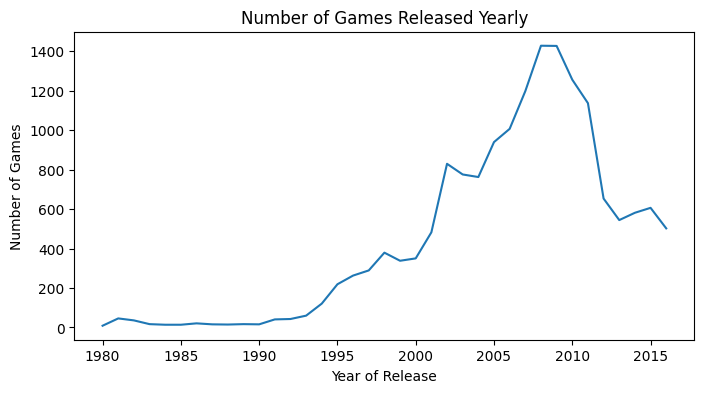

In [ ]:
# Creating a Line Chart: 
plt.figure(figsize=(8, 4))
plt.plot(yearly_game_counts)
plt.title('Number of Games Released Yearly')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.show()

The dataset covers 37 years, with an average of 452 games released per year, though this varies significantly **(standard deviation: 469.66)**. Game releases range from 9 (Min) to 1,696 (Max) per year, peaking around **2005 - 2011** before declining.  With 25% of years having fewer than 36 games and 25% having 762 or more. The median is 338 games per year, indicating limited data in earlier years, a rapid expansion starting in **1995** and a peak followed by decline in recent years.

In [ ]:
# Grouping 'platform' by 'total sales':
platform_sales = video_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
platform_sales.sample(n=5)

,year_of_release,platform,total_sales
2,1982,2600,28.88
140,2006,PS2,103.42
109,2002,GC,51.81
75,1998,N64,49.24
77,1998,PS,169.49


In [ ]:
# Sorting 'platform_sales' by total sales and select the top 10:
top_10_platforms = platform_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True).head(10)
top_10_platforms

,year_of_release,platform,total_sales
0,2004,PS2,211.81
1,2009,Wii,206.97
2,2002,PS2,205.38
3,2003,PS2,184.31
4,2008,Wii,171.32
5,2010,X360,170.03
6,1998,PS,169.49
7,2001,PS2,166.43
8,2005,PS2,160.66
9,2011,PS3,156.78


In [ ]:
# Sorting 'platform_sales' by total sales and select the bottom 10:
bottom_10_platforms = platform_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True).tail(10)
bottom_10_platforms

,year_of_release,platform,total_sales
228,2002,N64,0.08
229,2000,GBA,0.07
230,1985,PC,0.04
231,2008,DC,0.04
232,1992,GG,0.04
233,1996,PCFX,0.03
234,1988,PC,0.03
235,1985,DS,0.02
236,1994,3DO,0.02
237,2007,DC,0.02


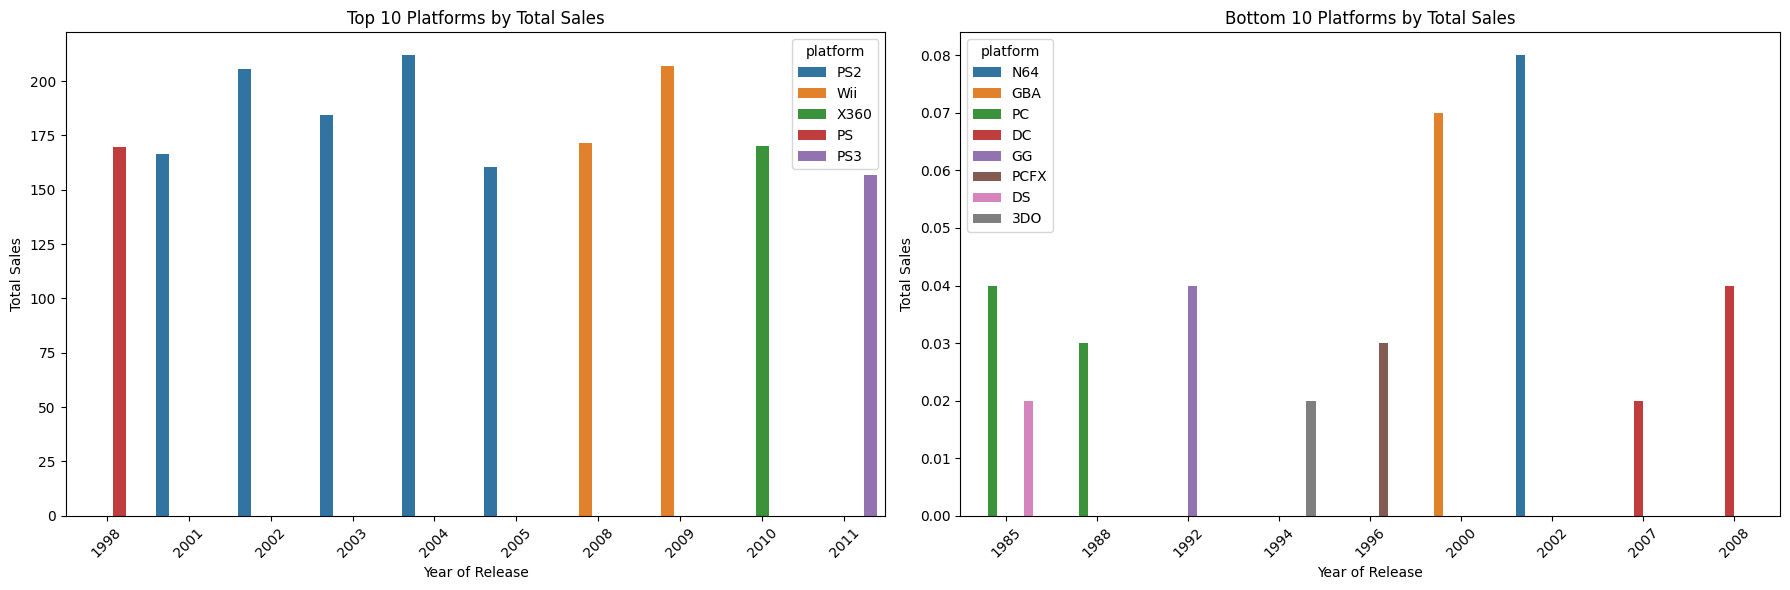

In [ ]:
# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# First subplot for 'top_10_platforms': 
sns.barplot(data=top_10_platforms, x='year_of_release', y='total_sales', hue='platform', ax=ax1)
ax1.set_xlabel('Year of Release')
ax1.set_ylabel('Total Sales')
ax1.set_title('Top 10 Platforms by Total Sales')
ax1.tick_params(axis='x', rotation=45)

# Second subplot for 'bottom_10_platforms':
sns.barplot(data=bottom_10_platforms, x='year_of_release', y='total_sales', hue='platform', ax=ax2)
ax2.set_title('Bottom 10 Platforms by Total Sales')
ax2.set_xlabel('Year of Release')
ax2.set_ylabel('Total Sales')
ax2.tick_params(axis='x', rotation=45)


# Adjusting layout to prevent overlap:
plt.tight_layout()
plt.show()

The graphs above shows a significant gap between the top and bottom platforms in total sales. The **PS2** dominates the top 10, followed by **The Xbox 360, PS3, Wii**, showcasing the success of brands like Sony, Microsoft and Nintendo. Most top performing platforms were released between 1998 and 2010. On the other hand, devices like **3DO, GG, PCFX**, many of which were released between 1985 and 1995, struggled with much lower sales.

In [ ]:
# Displaying data from 2013 and up:
video_games_from_2013 = video_games[video_games['year_of_release'] >= 2013].reset_index(drop=True)
video_games_from_2013.sample(n=5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
339,Dragon Quest Heroes: The World's Tree Woe and ...,PS4,2015,Action,0.17,0.13,0.37,0.06,NaN,NaN,Unknown,0.73
848,The Legend of Heroes: Trails of Cold Steel,PS3,2013,Role-Playing,0.05,0.02,0.12,0.01,86.0,7.7,T,0.20
1569,Toukiden Kiwami,PSP,2014,Action,0.00,0.00,0.05,0.00,NaN,NaN,Unknown,0.05
925,Jikkyou Powerful Pro Yakyuu 2013,PSP,2013,Sports,0.00,0.00,0.17,0.00,NaN,NaN,Unknown,0.17
715,Batman: Arkham Origins Blackgate,3DS,2013,Action,0.16,0.09,0.00,0.02,68.0,6.8,T,0.27


In [ ]:
# Calculating the 'total sales_2013' for each game:
video_games_from_2013['total_sales_2013'] = video_games_from_2013[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
video_games_from_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_2013
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,12.62


In [ ]:
# Grouping 'platform' by 'total sales' in the 'video_games_from_2013':
platform_sales_2013 = video_games_from_2013.groupby(['year_of_release', 'platform'])['total_sales_2013'].sum().reset_index()
platform_sales_2013.head()

,year_of_release,platform,total_sales_2013
0,2013,3DS,56.57
1,2013,DS,1.54
2,2013,PC,12.38
3,2013,PS3,113.25
4,2013,PS4,25.99


In [ ]:
# Sorting 'platform_sales_2013' by 'total_sales_2013' and select the top 5:
top_5_platforms = platform_sales_2013.sort_values(by='total_sales_2013', ascending=False).reset_index(drop=True).head()
top_5_platforms

,year_of_release,platform,total_sales_2013
0,2015,PS4,118.90
1,2013,PS3,113.25
2,2014,PS4,100.00
3,2013,X360,88.58
4,2016,PS4,69.25


In [ ]:
# Sorting 'platform_sales_2013' by 'total_sales_2013' and select the bottom 5:
bottom_5_platforms = platform_sales_2013.sort_values(by='total_sales_2013', ascending=False).reset_index(drop=True).tail()
bottom_5_platforms

,year_of_release,platform,total_sales_2013
35,2016,X360,1.52
36,2015,Wii,1.14
37,2014,PSP,0.24
38,2016,Wii,0.18
39,2015,PSP,0.12


From 2013 and up, **The Xbox 360, PS3, PS4** dominated total sales, highlighting their strong market impact and long-lasting popularity. In contrast, platforms like **PS2**, **PSP** and **Wii** saw a significant decline in sales, indicating the end of their lifecycle. 

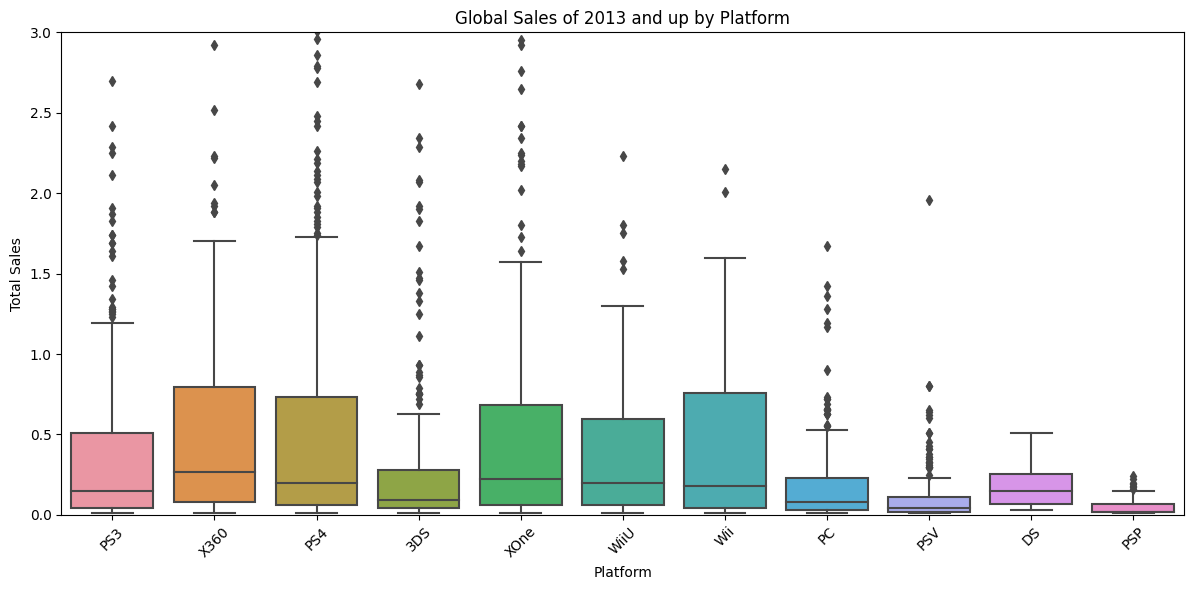

In [ ]:
# Createing the box plot:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales_2013', data=video_games_from_2013)
plt.title('Global Sales of 2013 and up by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0,3)
plt.show()

In [ ]:
# Calculating the Average of 'total_sales_2013':
average_sales_by_platform = video_games_from_2013.groupby('platform')['total_sales_2013'].mean().sort_values(ascending=False)
average_sales_by_platform

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
PSP     0.052239
Name: total_sales_2013, dtype: float64

From 2013 onward, **Xbox 360, PS4, XOne** dominated global sales, with higher average sales compared to other platforms. These platforms had a wide range of game performances, indicating strong popularity.

In contrast, platforms like **PSP, DS, PSV** had much lower sales, showing they were no longer major players in the market during this period. Platforms like **PC** had consistent but lower sales compared to the top platforms.

Overall, the top platforms significantly outperformed others, making them key drivers of the gaming industry after 2013.

In [ ]:
# Filtering data by the chosen platform:
platform_data = video_games_from_2013[video_games_from_2013['platform'] == 'X360']
platform_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_2013
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,16.27
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,10.24
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,Unknown,9.18,9.18
37,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28,4.28
40,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22,4.22


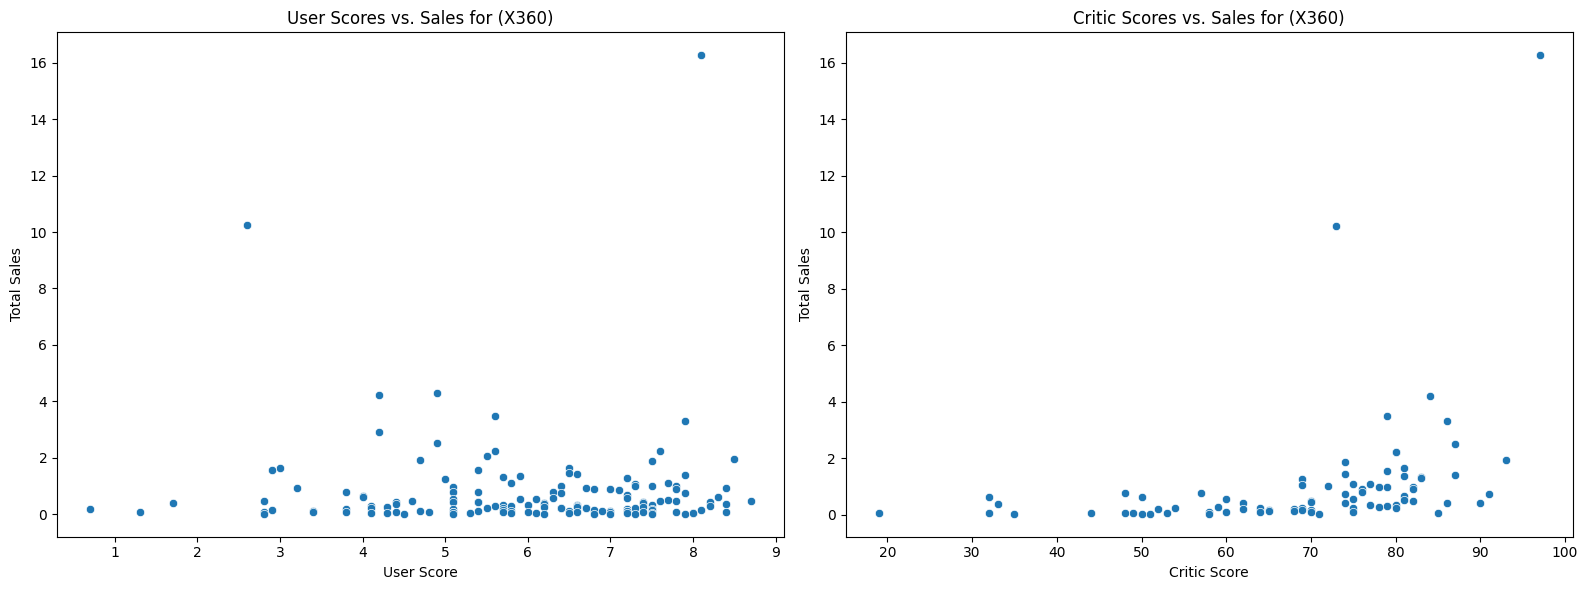

In [ ]:
# Create a figure with 2 subplots:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# First Scatter plot for user scores vs. 'total sales_2010':
sns.scatterplot(x='user_score', y='total_sales_2013', data=platform_data, ax=ax1)
ax1.set_title('User Scores vs. Sales for (X360)')
ax1.set_xlabel('User Score')
ax1.set_ylabel('Total Sales')

# Second Scatter plot for Critic Scores vs. 'total sales_2010':
sns.scatterplot(x='critic_score', y='total_sales_2013', data=platform_data, ax=ax2)
ax2.set_title('Critic Scores vs. Sales for (X360)')
ax2.set_xlabel('Critic Score')
ax2.set_ylabel('Total Sales')

# Adjust layout to prevent overlap:
plt.tight_layout()
plt.show()

In [ ]:
# Calculating correlation between User Score and Total Sales:
user_score_corr = platform_data['user_score'].corr(platform_data['total_sales_2013'])
f"Correlation (User Score Vs. Total Sales) for 'X360':{user_score_corr:.2f}"

"Correlation (User Score Vs. Total Sales) for 'X360':-0.01"

In [ ]:
# Calculating correlation between Critic Score and Total Sales:
critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales_2013'])
f"Correlation (Critic Score Vs. Total Sales) for 'X360':{critic_score_corr:.2f}"

"Correlation (Critic Score Vs. Total Sales) for 'X360':0.35"

The analysis shows that **User Score** have almost no impact on game sales for X360 (correlation: -0.01), while **Critic Score** show a weak positive influence (correlation: 0.35). This indicates that critic reviews may slightly influence sales.

In [ ]:
# Identifing Unique Names on X360:
x360_game = platform_data['name'].unique()
len(x360_game)

186

In [ ]:
# Filtering data across all platforms:
same_game = video_games_from_2013[video_games_from_2013['name'].isin(x360_game)]
same_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_sales_2013
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63,14.63
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,12.62
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,10.24


In [ ]:
# Grouping by Names and platform to compare Sales:
comparison_sales = same_game.groupby(['name', 'platform'])['total_sales_2013'].sum().reset_index()
comparison_sales.head(10)

,name,platform,total_sales_2013
0,2 in 1 Combo Pack: Sonic Heroes / Super Monkey...,X360,0.11
1,2014 FIFA World Cup Brazil,PS3,0.61
2,2014 FIFA World Cup Brazil,X360,0.43
3,Adventure Time: Explore the Dungeon Because I ...,3DS,0.14
4,Adventure Time: Explore the Dungeon Because I ...,PS3,0.04
5,Adventure Time: Explore the Dungeon Because I ...,WiiU,0.03
6,Adventure Time: Explore the Dungeon Because I ...,X360,0.08
7,Adventure Time: Finn & Jake Investigations,3DS,0.09
8,Adventure Time: Finn & Jake Investigations,PS3,0.08
9,Adventure Time: Finn & Jake Investigations,PS4,0.10


After filtering data across all platforms, **X360** appears to have higher sales for multi-platform games compared to other platforms. Meanwhile, **PS** has moderate sales for the same titles. 


In [ ]:
# Grouping data by Genre and Totale Sales:
genre_sales = video_games_from_2013.groupby('genre')['total_sales_2013'].sum().sort_values(ascending=False)
genre_sales

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales_2013, dtype: float64

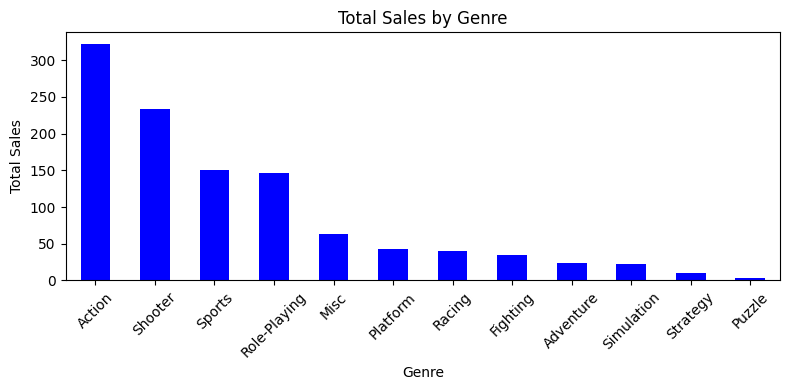

In [ ]:
plt.figure(figsize=(8, 4))
genre_sales.plot(kind='bar', color='blue')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

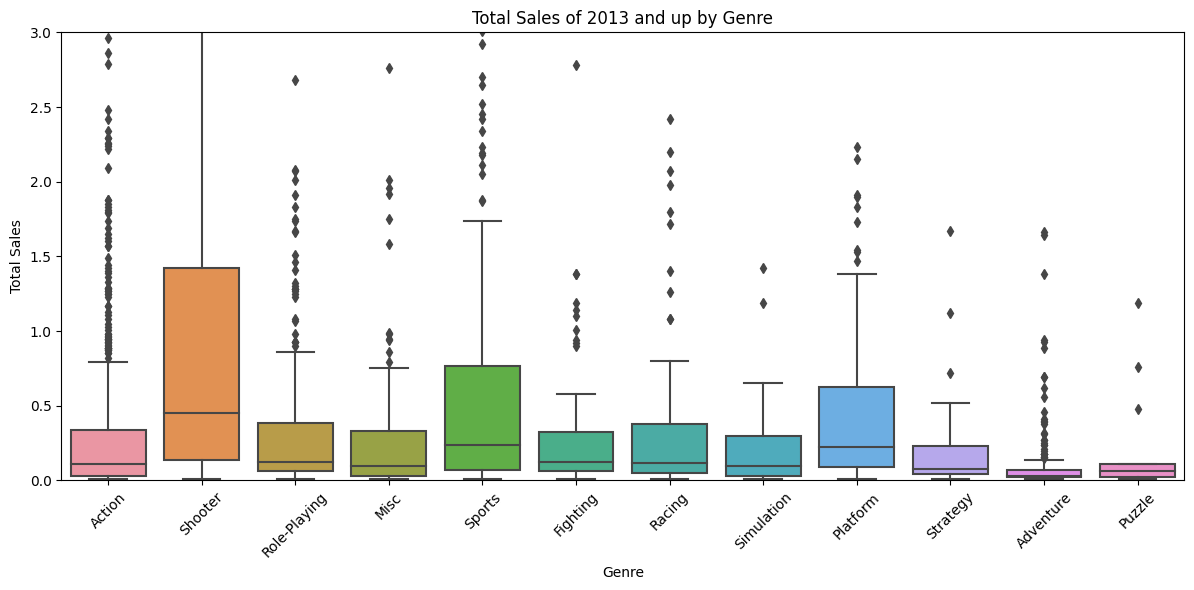

In [ ]:
# Createing the box plot:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales_2013', data=video_games_from_2013)
plt.title('Total Sales of 2013 and up by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0,3)
plt.show()

The graph above, shows that **Action, Shooter, Sports** genres have the highest total sales, making them the most popular and profitable. Genres like **Role-Playing, Racing** have moderate sales, while **Strategy, Puzzle** have the lowest sales.

# Step 5. Creating a user profile for each region:

In [ ]:
# Grouping Sales by Platform and Region:
region_platform_sales = video_games_from_2013.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
region_platform_sales

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,38.20,30.96,67.81,6.28
DS,0.57,0.85,0.00,0.12
PC,11.11,25.36,0.00,2.96
PS3,63.50,67.81,23.35,26.77
PS4,108.74,141.09,15.96,48.35
PSP,0.00,0.17,3.29,0.04
PSV,5.04,6.10,18.59,3.26
Wii,6.56,5.93,0.05,1.12
WiiU,29.21,19.85,10.88,4.69


In [ ]:
# Determining Top 5 Platforms in NA region:
top_na_platforms = region_platform_sales['na_sales'].sort_values(ascending=False).head()
top_na_platforms

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

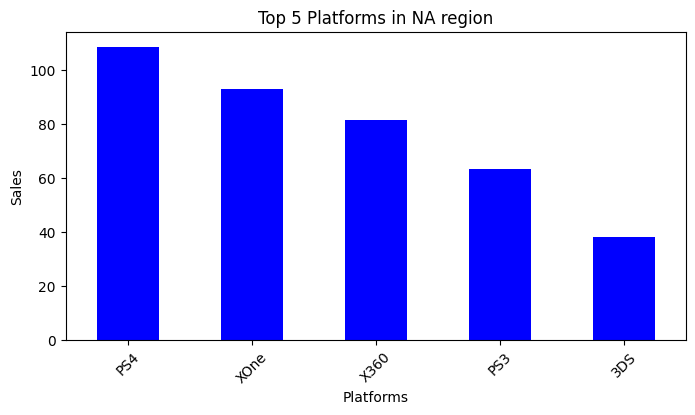

In [ ]:
# Creating a Bar Plot NA Region:
plt.figure(figsize=(8,4))
top_na_platforms.plot(kind='bar', color='blue')
plt.title('Top 5 Platforms in NA region')
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

**North American gamers** favored **XOne** and **PS4**, suggesting support and popularity during the chossen period (2013 and up). 

In [ ]:
# Determining Top 5 Platforms in EU region:
top_eu_platforms = region_platform_sales['eu_sales'].sort_values(ascending=False).head()
top_eu_platforms

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

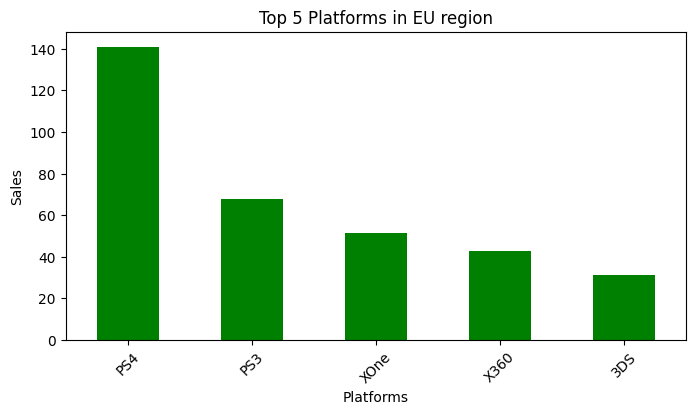

In [ ]:
# Creating a Bar Plot EU Region:
plt.figure(figsize=(8,4))
top_eu_platforms.plot(kind='bar', color='green')
plt.title('Top 5 Platforms in EU region')
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

**PS4** leads in **Europe**, showing its strong dominance.

In [ ]:
# Determining Top 5 Platforms in JP region:
top_jp_platforms = region_platform_sales['jp_sales'].sort_values(ascending=False).head()
top_jp_platforms

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

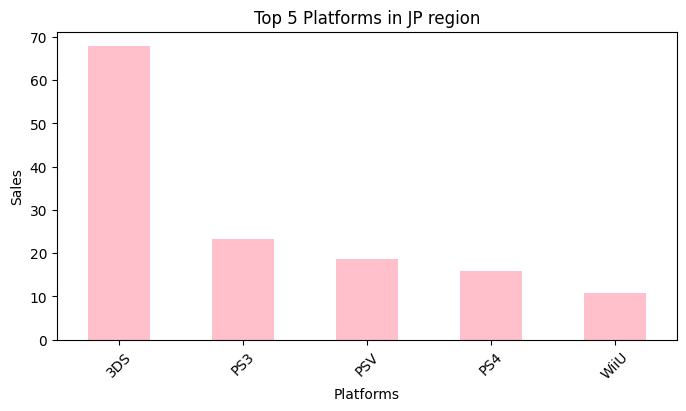

In [ ]:
# Creating a Bar Plot JP Region:
plt.figure(figsize=(8,4))
top_jp_platforms.plot(kind='bar', color='pink')
plt.title('Top 5 Platforms in JP region')
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

**Japan** has a unique gaming market whre handheld platforms like **3DS, PSV** dominate. This reflects a preference for portable gaming devices.

In [ ]:
# Determining Top 5 Platforms in Other regions:
top_other_platforms = region_platform_sales['other_sales'].sort_values(ascending=False).head()
top_other_platforms

platform
PS4     48.35
PS3     26.77
XOne    14.27
X360    12.11
3DS      6.28
Name: other_sales, dtype: float64

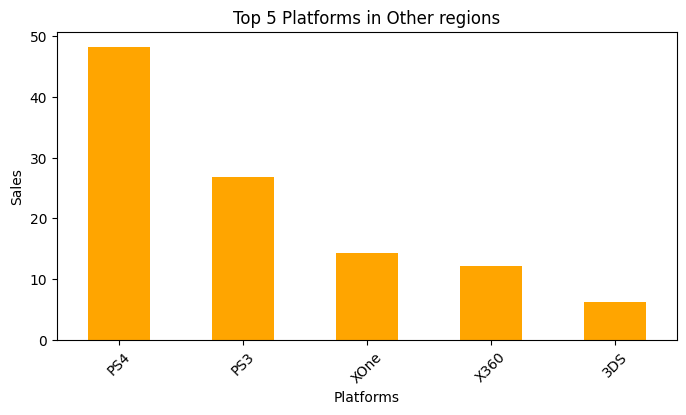

In [ ]:
# Creating a Bar Plot Other Regions:
plt.figure(figsize=(8,4))
top_other_platforms.plot(kind='bar', color='orange')
plt.title('Top 5 Platforms in Other regions')
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In **Other Regions** we can notice a dominance of **PS4, PS3, XOne**, which highlights a preference for home consoles.

In [ ]:
# Grouping by Genre and calculating total sales for each region:
region_genre_sales = video_games_from_2013.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
region_genre_sales

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,126.05,118.13,40.49,37.20
Adventure,7.14,8.25,5.82,2.43
Fighting,15.55,8.55,7.65,3.56
Misc,27.49,20.04,9.20,6.09
Platform,18.14,15.58,4.79,4.12
Puzzle,0.83,1.00,1.18,0.16
Racing,12.96,20.19,2.30,4.44
Role-Playing,46.40,36.97,51.04,11.48
Shooter,109.74,87.86,6.61,28.77


In [ ]:
# Determining Top 5 Genres in NA region:
top_na_genres = region_genre_sales['na_sales'].sort_values(ascending=False).head()
top_na_genres

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

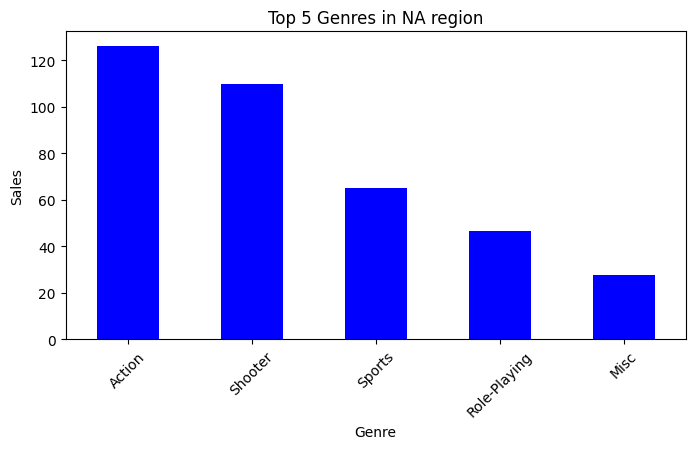

In [ ]:
# Creating a Bar Plot NA Region:
plt.figure(figsize=(8,4))
top_na_genres.plot(kind='bar', color='blue')
plt.title('Top 5 Genres in NA region')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

**North America** has a strong preference for **Action** and **Shooter** genres, which dominate the market. **Sports** games are also highly popular.

In [ ]:
# Determining Top 5 Genres in EU region:
top_eu_genres = region_genre_sales['eu_sales'].sort_values(ascending=False).head()
top_eu_genres

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

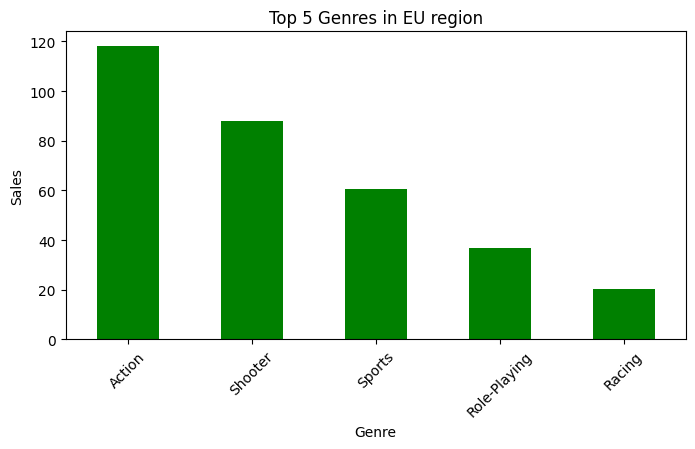

In [ ]:
# Creating a Bar Plot EU Region:
plt.figure(figsize=(8,4))
top_eu_genres.plot(kind='bar', color='green')
plt.title('Top 5 Genres in EU region')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

Similar to North America, **Europe** has a strong preference for **Action** and **Shooter** whith **Sports** games also performing well.

In [ ]:
# Determining Top 5 Genres in JP region:
top_jp_genres = region_genre_sales['jp_sales'].sort_values(ascending=False).head()
top_jp_genres

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

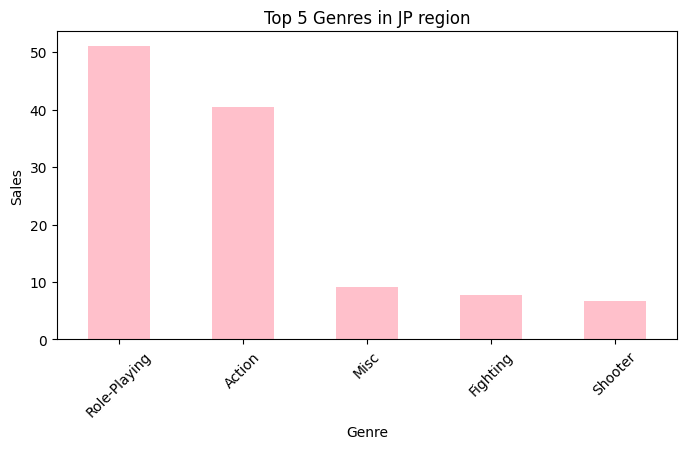

In [ ]:
# Creating a Bar Plot JP Region:
plt.figure(figsize=(8,4))
top_jp_genres.plot(kind='bar', color='pink')
plt.title('Top 5 Genres in JP region')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

The **Japanese** market prefers **Role-Playing** games significantly over other genres. **Action** games also perform well.

In [ ]:
# Determining Top 5 Genres in Other regions:
top_other_genres = region_genre_sales['other_sales'].sort_values(ascending=False).head()
top_other_genres

genre
Action          37.20
Shooter         28.77
Sports          19.45
Role-Playing    11.48
Misc             6.09
Name: other_sales, dtype: float64

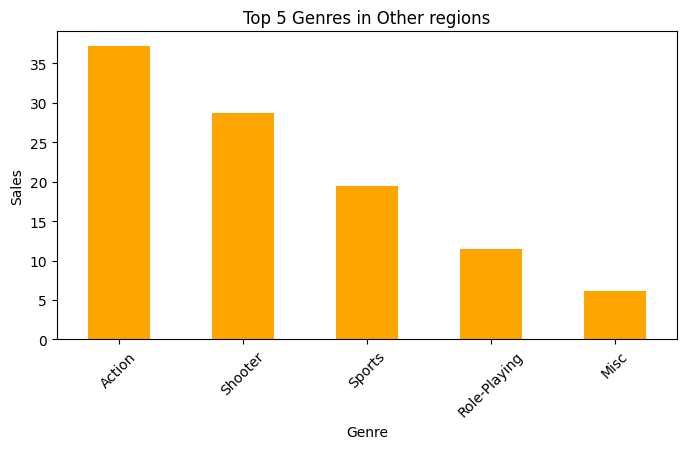

In [ ]:
# Creating a Bar Plot Other Regions:
plt.figure(figsize=(8,4))
top_other_genres.plot(kind='bar', color='orange')
plt.title('Top 5 Genres in Other regions')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

**Action** and **Shooter** continue to dominate, with **Sports** games also contributing significantly.

In [ ]:
# Grouping Sales by ESRB Rating for each region:
region_rating_sales = video_games_from_2013.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
region_rating_sales

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,79.05,83.36,15.14,22.61
E10+,54.24,42.69,5.89,12.57
M,165.21,145.32,14.11,47.04
T,49.79,41.95,20.59,14.29
Unknown,89.42,78.91,85.05,23.46


In [ ]:
# The impact of ESRB Rating in NA region:
na_esrb = region_rating_sales['na_sales'].sort_values(ascending=False)
na_esrb

rating
M          165.21
Unknown     89.42
E           79.05
E10+        54.24
T           49.79
Name: na_sales, dtype: float64

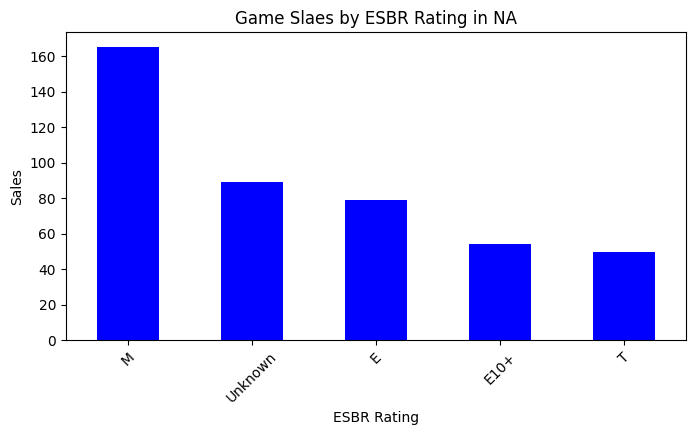

In [ ]:
# Creating a Bar Plot NA Region:
plt.figure(figsize=(8,4))
na_esrb.plot(kind='bar', color='blue')
plt.title('Game Slaes by ESBR Rating in NA')
plt.xlabel('ESBR Rating')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

Games rated **M** dominat sales, highlighting a preference for mature content, followed by games that thier rating is **Unknown** (maybe missing data). While **E**, **E10+** and **T** perform moderatly.

In [ ]:
# The impact of ESRB Rating in EU region:
eu_esrb = region_rating_sales['eu_sales'].sort_values(ascending=False)
eu_esrb

rating
M          145.32
E           83.36
Unknown     78.91
E10+        42.69
T           41.95
Name: eu_sales, dtype: float64

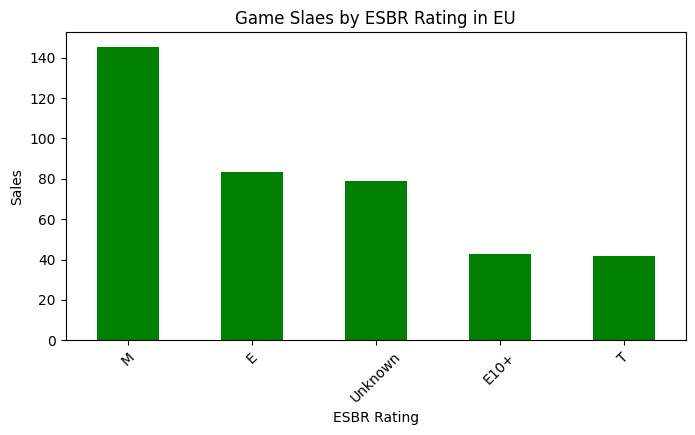

In [ ]:
# Creating a Bar Plot EU Region:
plt.figure(figsize=(8,4))
eu_esrb.plot(kind='bar', color='green')
plt.title('Game Slaes by ESBR Rating in EU')
plt.xlabel('ESBR Rating')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

**M** and **E** rated games lead sales highlighting a strong preference for mature games. **T** and **E10+** contribute less.

In [ ]:
# The impact of ESRB Rating in JP region:
jp_esrb = region_rating_sales['jp_sales'].sort_values(ascending=False)
jp_esrb

rating
Unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64

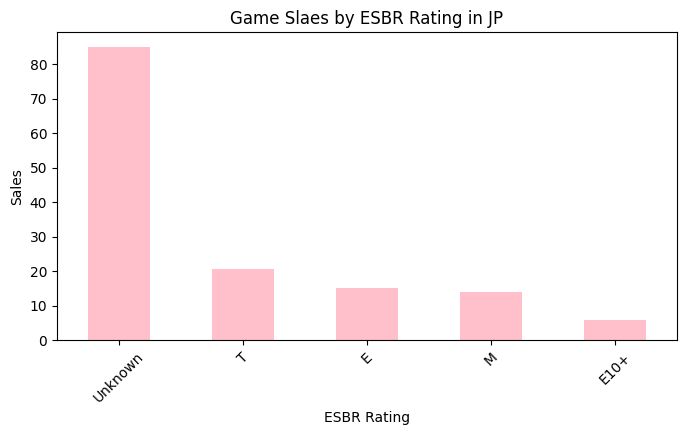

In [ ]:
# Creating a Bar Plot JP Region:
plt.figure(figsize=(8,4))
jp_esrb.plot(kind='bar', color='pink')
plt.title('Game Slaes by ESBR Rating in JP')
plt.xlabel('ESBR Rating')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

The majority of game sales in **Japan** lack ESRB rating, indicating missing data or differences in rating systems. Other then that **T** and **E** rated games are dominant.

In [ ]:
# The impact of ESRB Rating in Other regions:
other_esrb = region_rating_sales['other_sales'].sort_values(ascending=False)
other_esrb

rating
M          47.04
Unknown    23.46
E          22.61
T          14.29
E10+       12.57
Name: other_sales, dtype: float64

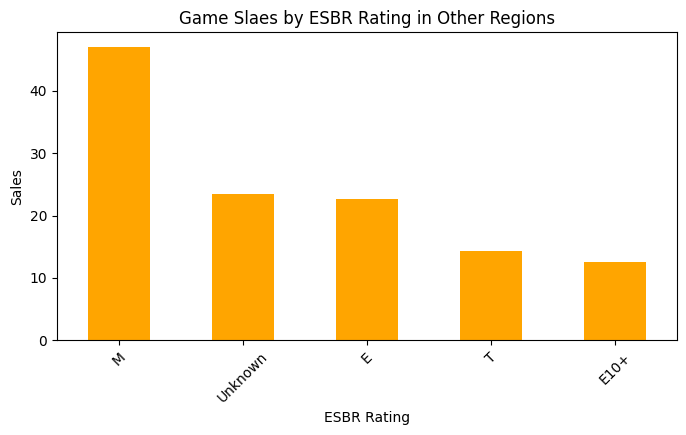

In [ ]:
# Creating a Bar Plot Other Regions:
plt.figure(figsize=(8,4))
other_esrb.plot(kind='bar', color='orange')
plt.title('Game Slaes by ESBR Rating in Other Regions')
plt.xlabel('ESBR Rating')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

The **M** rated games dominate sales in **Other Regions** indicating a greater demand for mature content. However, the high **Unknown** rating indicates incomplete data or a different rating systems.

# Step 5. Testing the hypotheses:

#Test the hypotheses:

- Null Hypothesis (H_0): Average user ratings of the Xbox One and PC platforms are the same.

- Alternative Hypothesis (H_1): Average user ratings of the Xbox One and PC platforms are different. 

In [ ]:
# Extracting user ratings for each platform:
xbox_one_ratings = video_games_from_2013[video_games_from_2013['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = video_games_from_2013[video_games_from_2013['platform'] == 'PC']['user_score'].dropna()

# Conducting the t-test:
t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

# Printing the results:
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: Average user ratings differ between Xbox One and PC.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user ratings.")



T-statistic: 1.4053826535211684, P-value: 0.16097023533449153
Fail to reject the null hypothesis: No significant difference in average user ratings.


#Test the hypotheses:

- Null Hypothesis (H_0): Average user ratings for the Action and Sports genres are the same.

- Alternative Hypothesis (H_1): Average user ratings for the Action and Sports genres are different.

In [ ]:
# Extracting user ratings for each genre:
action_ratings = video_games_from_2013[video_games_from_2013['genre'] == 'Action']['user_score'].dropna()
sports_ratings = video_games_from_2013[video_games_from_2013['genre'] == 'Sports']['user_score'].dropna()

# Conducting the t-test:
t_stat, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Printing the results:
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings differ between Action and Sports genres.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user ratings.")

T-statistic: 9.644285502596306, P-value: 7.631940781789286e-19
Reject the null hypothesis: Average user ratings differ between Action and Sports genres.


# General Conclusion:

The dataset highlights significant trends in the gaming industry over 37 years, showcasing variability in game releases and sales performance across platforms and genres. The number of games released per year fluctuates widely, with a median of **338 games**, reflecting both peaks in production and years with limited activity.

Platform performance varied significantly, with **PS2**, **Xbox 360**, **PS3**, and **Wii** dominating total sales, especially between **1998** and **2013**. **Post-2013**, **Xbox One**, **PS4** led the market, while older platforms like **PS2** and **PSP** experienced sharp declines. Handheld platforms like **3DO**, and **PCFX** struggled to achieve meaningful sales, underscoring the dominance of major brands like **Sony**, **Microsoft**, and **Nintendo**.

Sales trends also show that in all regions **Action**, **Shooter**, and **Sports** genres were the most profitable, while **Strategy** and **Puzzle** genres had the lowest sales. Critic Reviews have a weak positive impact on sales **(correlation: 0.35)**, while User Scores have almost no influence **(correlation: -0.01)**. Across all regions, platforms like **PS** demonstrated higher sales for multi-platform games compared to **XOne**, which showed moderate performance.

Games rated **E** and **M** dominate sales across regions, reflecting a balance between broad audience appeal and mature content demand. **T** and **E10+** contribute moderately. However, the high **Unknown** rating indicates incomplete data or a different rating systems.